In [118]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
all_data_values = pd.DataFrame()
all_data_generation = pd.DataFrame()
all_data_individual = pd.DataFrame()
for i in range(1,2):
    db_path = "database"+"/db.sqlite"
    print(db_path)
    con = sqlite3.connect(db_path)
    cur = con.cursor()
    res = cur.execute("SELECT * FROM float")
    names = list(map(lambda x: x[0], cur.description))
    values = res.fetchall()
    values = pd.DataFrame(values,columns=names)
    values['run_num'] = i

    res = cur.execute("SELECT * FROM ea_optimizer_generation")
    names = list(map(lambda x: x[0], cur.description))
    generation = res.fetchall()
    generation = pd.DataFrame(generation,columns=names)
    generation['run_num'] = i

    res = cur.execute("SELECT * FROM ea_optimizer_individual")
    names = list(map(lambda x: x[0], cur.description))
    individual = res.fetchall()
    individual = pd.DataFrame(individual,columns=names)
    individual['run_num'] = i
    con.close()
    all_data_values = all_data_values.append(values)
    all_data_generation = all_data_generation.append(generation)
    all_data_individual = all_data_individual.append(individual)
    

database/db.sqlite


/var/folders/30/mhmgrgh17yg7pky3_sndswqr0000gn/T/ipykernel_49099/1578438936.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_values = all_data_values.append(values)
/var/folders/30/mhmgrgh17yg7pky3_sndswqr0000gn/T/ipykernel_49099/1578438936.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_generation = all_data_generation.append(generation)
/var/folders/30/mhmgrgh17yg7pky3_sndswqr0000gn/T/ipykernel_49099/1578438936.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_individual = all_data_individual.append(individual)


In [120]:
all_data_values = pd.DataFrame()
all_data_generation = pd.DataFrame()
all_data_individual = pd.DataFrame()
db_path = "database"+"/db.sqlite"
print(db_path)
con = sqlite3.connect(db_path)
cur = con.cursor()
res = cur.execute("SELECT * FROM float")
names = list(map(lambda x: x[0], cur.description))
values = res.fetchall()
values = pd.DataFrame(values,columns=names)

res = cur.execute("SELECT * FROM ea_optimizer_generation")
names = list(map(lambda x: x[0], cur.description))
generation = res.fetchall()
generation = pd.DataFrame(generation,columns=names)

res = cur.execute("SELECT * FROM ea_optimizer_individual")
names = list(map(lambda x: x[0], cur.description))
individual = res.fetchall()
individual = pd.DataFrame(individual,columns=names)

con.close()
all_data_values = all_data_values.append(values)
all_data_generation = all_data_generation.append(generation)
all_data_individual = all_data_individual.append(individual)

database/db.sqlite


/var/folders/30/mhmgrgh17yg7pky3_sndswqr0000gn/T/ipykernel_49099/2117036220.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_values = all_data_values.append(values)
/var/folders/30/mhmgrgh17yg7pky3_sndswqr0000gn/T/ipykernel_49099/2117036220.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_generation = all_data_generation.append(generation)
/var/folders/30/mhmgrgh17yg7pky3_sndswqr0000gn/T/ipykernel_49099/2117036220.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_individual = all_data_individual.append(individual)


In [121]:
fmix = all_data_generation.set_index('individual_id','run_num').join(all_data_individual.set_index('individual_id','run_num'),lsuffix='l')
fmix
full = fmix.set_index('float_id','run_num',).join(all_data_values.set_index('id','run_num'),lsuffix='l')
full['bone_size_avg'] = full['bone_size_sum']/full['bone_count']

/var/folders/30/mhmgrgh17yg7pky3_sndswqr0000gn/T/ipykernel_49099/1251806050.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  fmix = all_data_generation.set_index('individual_id','run_num').join(all_data_individual.set_index('individual_id','run_num'),lsuffix='l')
/var/folders/30/mhmgrgh17yg7pky3_sndswqr0000gn/T/ipykernel_49099/1251806050.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  fmix = all_data_generation.set_index('individual_id','run_num').join(all_data_individual.set_index('individual_id','run_num'),lsuffix='l')
/var/folders/30/mhmgrgh17yg7pky3_sndswqr0000gn/T/ipykernel_49099/1251806050.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  full = fmix.set_index('float_id','run_num',).join(all_data_values

In [122]:
full.columns
cols = 'generation_index','age', 'inverse_age',\
       'birth', 'speed_y', 'speed_x',\
       'relative_speed_y', 'displacement', 'average_z', 'head_balance',\
       'modules_count', 'hinge_count', 'brick_count', 'bone_count',\
       'bone_size_sum', 'hinge_prop', 'brick_prop', 'branching_count',\
       'branching_prop', 'extremities', 'extensiveness', 'extremities_prop',\
       'extensiveness_prop', 'width', 'height', 'coverage', 'proportion',\
       'symmetry', 'hinge_ratio', 'run_num','bone_size_avg'

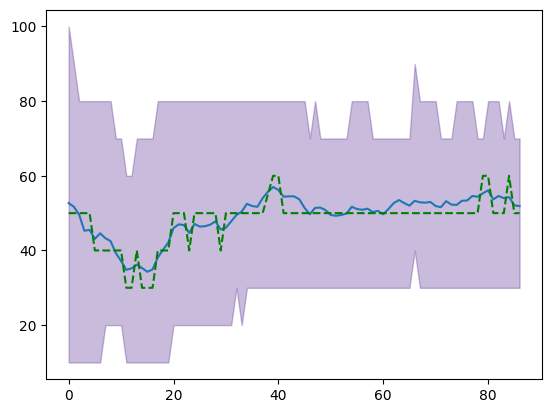

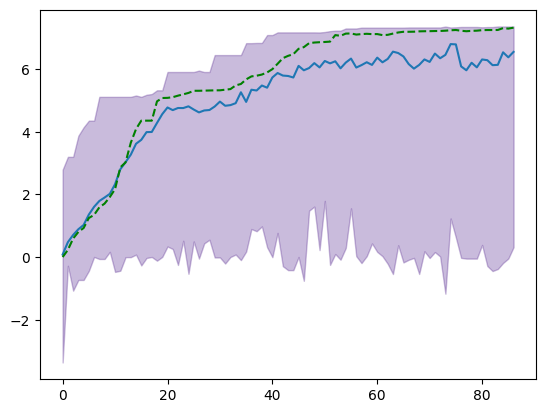

In [123]:
#measure = 'height'

cols = ['sum_mask','speed_y']
for i in cols:
    try:
        clr = plt.cm.Purples(0.9)
        plot_data_min = full[['generation_index',i]].groupby(['generation_index']).min()
        plot_data_max = full[['generation_index',i]].groupby(['generation_index']).max()
        plot_data = full[['generation_index',i]].groupby(['generation_index']).mean()
        plot_data_median = full[['generation_index',i]].groupby(['generation_index']).median()
        fig=plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(plot_data.index,plot_data[i],label = 'mean')
        ax.plot(plot_data_median.index,plot_data_median[i],label = 'median',color='green',linestyle='dashed')
        ax.fill_between(plot_data[i].index, plot_data_min[i], plot_data_max[i], alpha=0.3, edgecolor=clr, facecolor=clr)
        #aplt.plot(plot_data_min.index,plot_data_min[i],label = 'min')
        # plt.plot(plot_data_max.index,plot_data_max[i],label = 'max')
        ax.set_ylim([plot_data_min[i]-2.5,plot_data_max[i]*1.5])
        #plt.update_layout(yaxis_range=[plot_data_min[i].min()-2.5,plot_data_max[i].max()*1.5])
        
        plt.title(i)
        #plt.title = i
        #plt.show()
        plt.savefig('plots/'+i+'.png')
        plt.show()
    except:
        continue

In [124]:
full[["generation_index","individual_index","brain_mask","sum_mask","speed_y"]].sort_values(by=['sum_mask'],ascending=False).head(10)

,generation_index,individual_index,brain_mask,sum_mask,speed_y
10,0,9,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",100.0,0.003228
6631,66,93,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]",90.0,2.321563
39,0,38,"[1, 1, 1, 1, 1, 0, 1, 1, 1, 1]",90.0,0.155821
179,1,69,"[1, 1, 1, 1, 0, 1, 1, 1, 1, 1]",90.0,0.231185
86,0,85,"[1, 1, 1, 1, 1, 0, 1, 1, 1, 1]",90.0,-0.003478
35,0,34,"[1, 1, 0, 1, 1, 1, 1, 1, 1, 1]",90.0,0.238851
39,1,33,"[1, 1, 1, 1, 1, 0, 1, 1, 1, 1]",90.0,0.155821
2978,33,1,"[0, 0, 1, 1, 1, 1, 1, 1, 1, 1]",80.0,6.450251
2978,37,1,"[0, 0, 1, 1, 1, 1, 1, 1, 1, 1]",80.0,6.450251
2978,36,28,"[0, 0, 1, 1, 1, 1, 1, 1, 1, 1]",80.0,6.450251


In [125]:
full[["generation_index","individual_index","brain_mask","sum_mask","speed_y"]].sort_values(by=['speed_y'],ascending=False).head(10)

,generation_index,individual_index,brain_mask,sum_mask,speed_y
8315,83,73,"[0, 0, 1, 1, 1, 0, 0, 0, 0, 0]",30.0,7.363458
8696,86,94,"[0, 0, 1, 1, 0, 0, 0, 1, 1, 1]",50.0,7.363458
8543,85,74,"[0, 0, 1, 1, 1, 0, 0, 1, 1, 1]",60.0,7.363458
8543,86,54,"[0, 0, 1, 1, 1, 0, 0, 1, 1, 1]",60.0,7.363458
8315,85,29,"[0, 0, 1, 1, 1, 0, 0, 0, 0, 0]",30.0,7.363458
8315,84,27,"[0, 0, 1, 1, 1, 0, 0, 0, 0, 0]",30.0,7.363458
7301,73,77,"[0, 0, 1, 1, 1, 0, 1, 0, 0, 0]",40.0,7.360284
8420,84,83,"[0, 0, 1, 1, 1, 0, 0, 1, 1, 1]",60.0,7.359964
8601,86,86,"[0, 0, 1, 1, 1, 0, 1, 1, 1, 0]",60.0,7.348724
7628,77,2,"[0, 0, 1, 1, 1, 1, 1, 0, 1, 0]",60.0,7.347836


In [126]:
plot_data_max

,speed_y
generation_index,
0,2.791058
1,3.201523
2,3.201523
3,3.874779
4,4.144502
...,...
82,7.344605
83,7.363458
84,7.363458


In [127]:
all_data_values.sort_values(by=['speed_y'],ascending=False).head(10)

,id,birth,speed_y,speed_x,relative_speed_y,displacement,average_z,head_balance,modules_count,hinge_count,...,extremities_prop,extensiveness_prop,width,height,coverage,proportion,symmetry,hinge_ratio,brain_mask,sum_mask
6656,6657,0.0,7.364972,-0.211730,0.433234,1.473603,0.032884,0.998352,17.0,8.0,...,0.333333,0.8,9.0,9.0,0.209877,1.0,1.0,0.0,"[0, 0, 1, 1, 1, 0, 1, 0, 1, 1]",60.0
8542,8543,0.0,7.363458,-0.241121,0.433145,1.473481,0.033003,0.998264,17.0,8.0,...,0.333333,0.8,9.0,9.0,0.209877,1.0,1.0,0.0,"[0, 0, 1, 1, 1, 0, 0, 1, 1, 1]",60.0
8695,8696,0.0,7.363458,-0.241121,0.433145,1.473481,0.033003,0.998264,17.0,8.0,...,0.333333,0.8,9.0,9.0,0.209877,1.0,1.0,0.0,"[0, 0, 1, 1, 0, 0, 0, 1, 1, 1]",50.0
8314,8315,0.0,7.363458,-0.241121,0.433145,1.473481,0.033003,0.998264,17.0,8.0,...,0.333333,0.8,9.0,9.0,0.209877,1.0,1.0,0.0,"[0, 0, 1, 1, 1, 0, 0, 0, 0, 0]",30.0
7441,7442,0.0,7.360284,-0.204280,0.432958,1.472624,0.032964,0.998289,17.0,8.0,...,0.333333,0.8,9.0,9.0,0.209877,1.0,1.0,0.0,"[0, 0, 1, 1, 1, 1, 0, 0, 1, 1]",60.0
7300,7301,0.0,7.360284,-0.204280,0.432958,1.472624,0.032964,0.998289,17.0,8.0,...,0.333333,0.8,9.0,9.0,0.209877,1.0,1.0,0.0,"[0, 0, 1, 1, 1, 0, 1, 0, 0, 0]",40.0
8419,8420,0.0,7.359964,-0.234659,0.432939,1.472741,0.032934,0.998297,17.0,8.0,...,0.333333,0.8,9.0,9.0,0.209877,1.0,1.0,0.0,"[0, 0, 1, 1, 1, 0, 0, 1, 1, 1]",60.0
8587,8588,0.0,7.359964,-0.234659,0.432939,1.472741,0.032934,0.998297,17.0,8.0,...,0.333333,0.8,9.0,9.0,0.209877,1.0,1.0,0.0,"[0, 0, 1, 1, 0, 0, 0, 1, 1, 0]",40.0
8600,8601,0.0,7.348724,-0.209671,0.432278,1.470343,0.032865,0.998362,17.0,8.0,...,0.333333,0.8,9.0,9.0,0.209877,1.0,1.0,0.0,"[0, 0, 1, 1, 1, 0, 1, 1, 1, 0]",60.0
7627,7628,0.0,7.347836,-0.297181,0.432226,1.470769,0.032832,0.998387,17.0,8.0,...,0.333333,0.8,9.0,9.0,0.209877,1.0,1.0,0.0,"[0, 0, 1, 1, 1, 1, 1, 0, 1, 0]",60.0


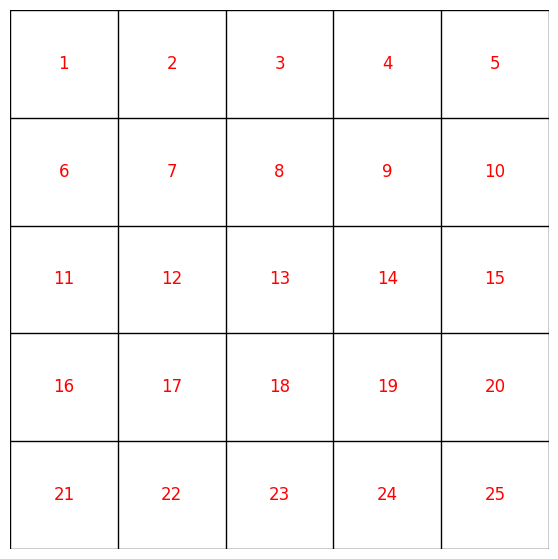

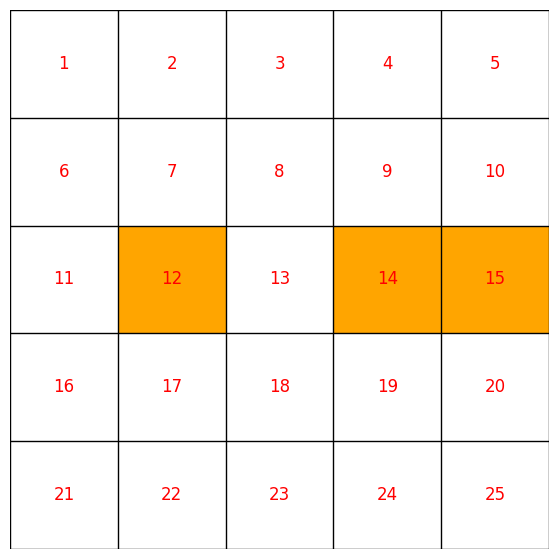

In [140]:
import matplotlib.pyplot as plt
import numpy as np
import ast
def draw_grid_with_colors(orange_ids=[]):
    fig, ax = plt.subplots(figsize=(7, 7))

    # Draw the grid lines
    for x in range(6):
        ax.axhline(x, color='black', linewidth=1)
        ax.axvline(x, color='black', linewidth=1)

    # Label the grid points with unique IDs
    labels = np.arange(1, 26).reshape(5, 5)
    for i in range(5):
        for j in range(5):
            cell_id = labels[i, j]
            color = "orange" if cell_id in orange_ids else "white"
            ax.add_patch(plt.Rectangle((j, 4-i), 1, 1, facecolor=color))
            ax.text(j+0.5, 4.5-i, str(cell_id), ha='center', va='center', fontsize=12, color="red")

    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)
    ax.set_aspect('equal', 'box')
    ax.axis('off')  # Turn off the axis

    plt.show()

# Draw the initial grid
draw_grid_with_colors()

# Prompt the user for the IDs to color orange
x = full[["generation_index","individual_index","brain_mask","sum_mask","speed_y"]].sort_values(by=['speed_y'],ascending=False)['brain_mask'].iloc[0]
x = ast.literal_eval(x)
x = np.array(x).astype(int)
# spider_mask = np.array([12,11,14,15,8,3,18,23,13,13])

spider_mask = np.array([8,3,14,15,12,11,18,23,13,13])

y = spider_mask

res_spider = np.array(x)*np.array(y)
filtered = res_spider[res_spider != 0]
comma_delimited_str = ', '.join(map(str, filtered))

orange_ids_input = comma_delimited_str#input("Please provide a list of IDs (comma-separated) that you'd like to turn orange (e.g., 2,5,10): ")
orange_ids = [int(id.strip()) for id in orange_ids_input.split(",")]

# # Redraw the grid with the specified colors
draw_grid_with_colors(orange_ids)


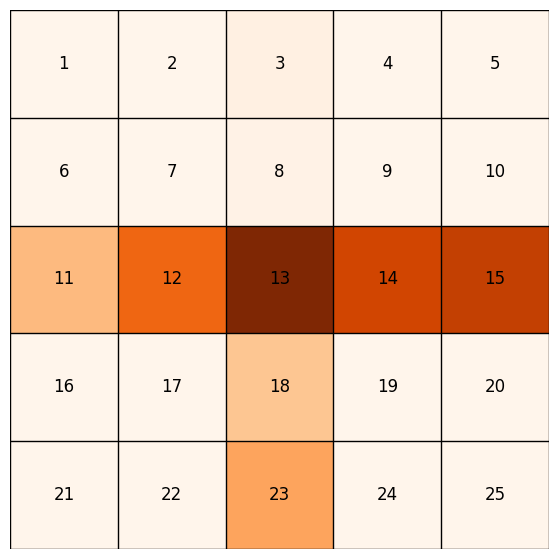

In [141]:
def compute_density(full, spider_mask):
    # List to store all the occurrences
    all_occurrences = []
    
    # Process all the brain masks in the dataset
    for brain_mask_str in full['brain_mask']:
        brain_mask = ast.literal_eval(brain_mask_str)
        brain_mask = np.array(brain_mask).astype(int)
        
        res_spider = np.array(brain_mask) * spider_mask
        filtered = res_spider[res_spider != 0]
        
        all_occurrences.extend(filtered)
        
    # Aggregate the count of occurrences for each rectangle ID
    unique, counts = np.unique(all_occurrences, return_counts=True)
    density = dict(zip(unique, counts))
    
    return density

def draw_grid_with_density(density):
    fig, ax = plt.subplots(figsize=(7, 7))

    # Draw the grid lines
    for x in range(6):
        ax.axhline(x, color='black', linewidth=1)
        ax.axvline(x, color='black', linewidth=1)

    # Label the grid points with unique IDs
    labels = np.arange(1, 26).reshape(5, 5)
    max_density = max(density.values()) if density else 1  # to avoid division by zero
    
    for i in range(5):
        for j in range(5):
            cell_id = labels[i, j]
            count = density.get(cell_id, 0)
            color_intensity = count / max_density
            ax.add_patch(plt.Rectangle((j, 4-i), 1, 1, facecolor=plt.cm.Oranges(color_intensity)))
            ax.text(j+0.5, 4.5-i, str(cell_id), ha='center', va='center', fontsize=12, color="black")

    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)
    ax.set_aspect('equal', 'box')
    ax.axis('off')  # Turn off the axis

    plt.show()

density = compute_density(full, spider_mask)
draw_grid_with_density(density)


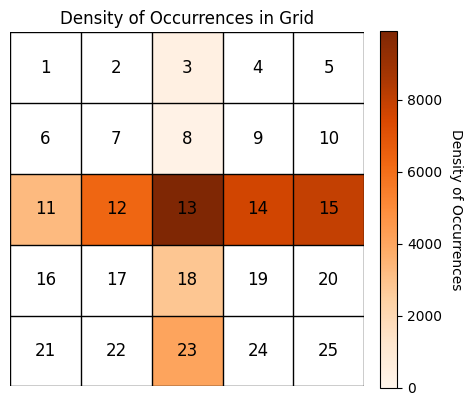

In [142]:
def draw_grid_with_density_enhanced_white(density, mask_ids):
    fig, ax = plt.subplots(figsize=(5, 5))

    # Draw the grid lines
    for x in range(6):
        ax.axhline(x, color='black', linewidth=1)
        ax.axvline(x, color='black', linewidth=1)

    # Label the grid points with unique IDs
    labels = np.arange(1, 26).reshape(5, 5)
    max_density = max(density.values()) if density else 1  # to avoid division by zero
    
    for i in range(5):
        for j in range(5):
            cell_id = labels[i, j]
            if cell_id not in mask_ids:
                ax.add_patch(plt.Rectangle((j, 4-i), 1, 1, facecolor="white"))
            else:
                count = density.get(cell_id, 0)
                color_intensity = count / max_density
                color = plt.cm.Oranges(color_intensity)
                ax.add_patch(plt.Rectangle((j, 4-i), 1, 1, facecolor=color))
            ax.text(j+0.5, 4.5-i, str(cell_id), ha='center', va='center', fontsize=12, color="black")

    # Add colorbar to explain the color intensity
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Oranges, norm=plt.Normalize(vmin=0, vmax=max_density))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label('Density of Occurrences', rotation=270, labelpad=15)
    
    # Add title and axis labels
    ax.set_title("Density of Occurrences in Grid")
    ax.set_xlabel("Columns")
    ax.set_ylabel("Rows")

    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)
    ax.set_aspect('equal', 'box')
    ax.axis('off')  # Turn off the axis

    plt.show()

# Using the same example data from before
mask_ids = set(spider_mask)
draw_grid_with_density_enhanced_white(density, mask_ids)


In [143]:
def compute_density_for_generations(full, spider_mask, start_gen, end_gen):
    # Filter the DataFrame based on the provided range of generation_index
    filtered_df = full[(full['generation_index'] >= start_gen) & (full['generation_index'] <= end_gen)]
    
    # Compute density for the filtered data
    density = compute_density(filtered_df, spider_mask)
    
    return density

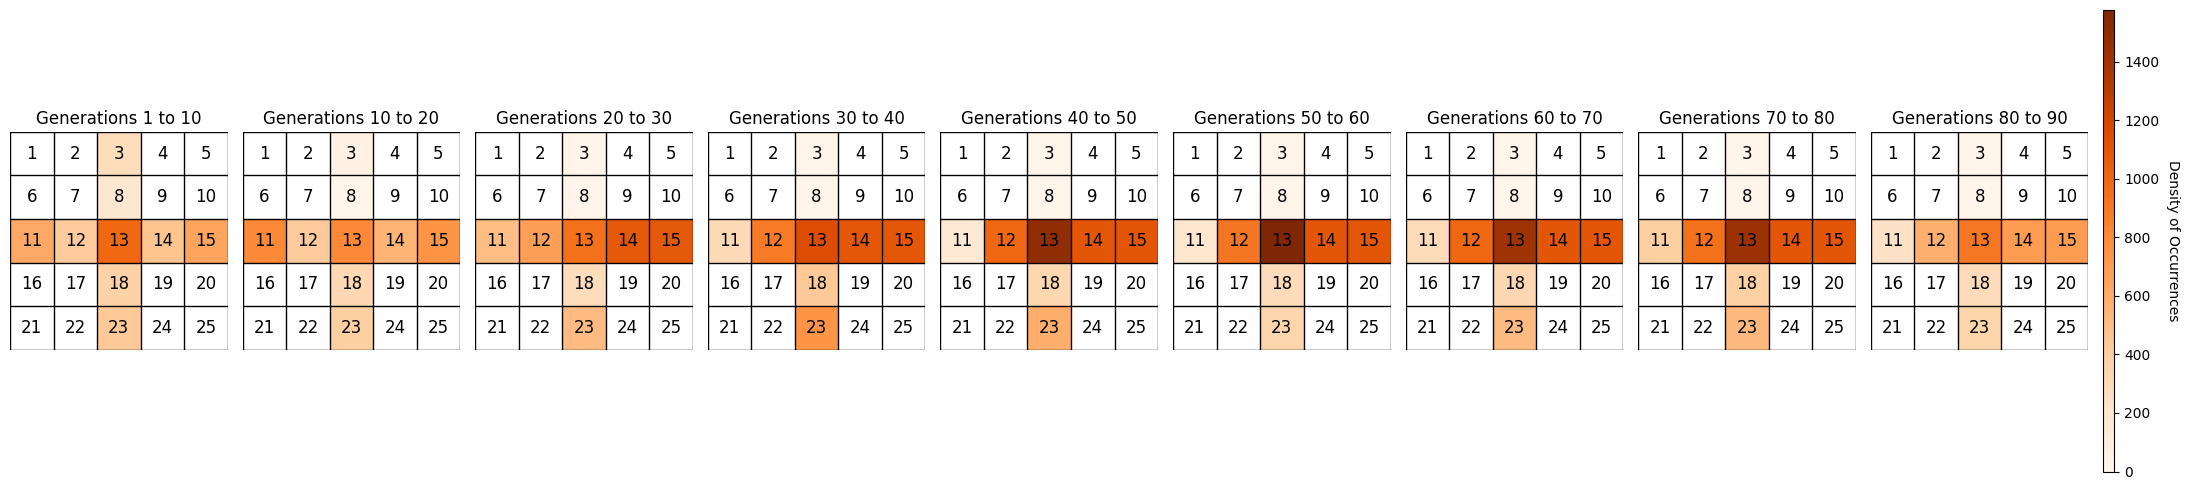

In [144]:
from matplotlib import gridspec

def draw_grid_with_density_side_by_side_with_external_colorbar(full, spider_mask, generation_ranges, mask_ids):
    # Number of subplots
    num_subplots = len(generation_ranges)
    
    # Create a single figure with GridSpec for better layout control
    fig = plt.figure(figsize=(22, 5))
    gs = gridspec.GridSpec(1, num_subplots + 1, width_ratios=[1]*num_subplots + [0.05])
    axes = [plt.subplot(gs[i]) for i in range(num_subplots)]
    
    max_global_density = 0  # To store the highest density across all subplots
    
    # First pass to compute the global max density
    for start_gen, end_gen in generation_ranges:
        density = compute_density_for_generations(full, spider_mask, start_gen, end_gen)
        max_density = max(density.values()) if density else 1
        if max_density > max_global_density:
            max_global_density = max_density
    
    # Drawing the grids
    for idx, (start_gen, end_gen) in enumerate(generation_ranges):
        ax = axes[idx]
        
        # Compute density for the specific generation range
        density = compute_density_for_generations(full, spider_mask, start_gen, end_gen)
        
        # Draw the grid for this subplot
        for x in range(6):
            ax.axhline(x, color='black', linewidth=1)
            ax.axvline(x, color='black', linewidth=1)
            
        labels = np.arange(1, 26).reshape(5, 5)
        for i in range(5):
            for j in range(5):
                cell_id = labels[i, j]
                if cell_id not in mask_ids:
                    ax.add_patch(plt.Rectangle((j, 4-i), 1, 1, facecolor="white"))
                else:
                    count = density.get(cell_id, 0)
                    color_intensity = count / max_global_density
                    color = plt.cm.Oranges(color_intensity)
                    ax.add_patch(plt.Rectangle((j, 4-i), 1, 1, facecolor=color))
                ax.text(j+0.5, 4.5-i, str(cell_id), ha='center', va='center', fontsize=12, color="black")
        
        ax.set_xlim(0, 5)
        ax.set_ylim(0, 5)
        ax.set_aspect('equal', 'box')
        ax.axis('off')
        ax.set_title(f"Generations {start_gen} to {end_gen}")
    
    # Add a shared colorbar to the right side of the figure
    cbar_ax = plt.subplot(gs[-1])
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Oranges, norm=plt.Normalize(vmin=0, vmax=max_global_density))
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cbar_ax, orientation='vertical')
    cbar.set_label('Density of Occurrences', rotation=270, labelpad=15)
    
    # Adjust spacing between subplots
    plt.tight_layout()
    plt.show()

generation_ranges = [(1, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60,70), (70, 80), (80, 90)]

# Using the defined generation ranges to visualize
draw_grid_with_density_side_by_side_with_external_colorbar(full, spider_mask, generation_ranges, mask_ids)


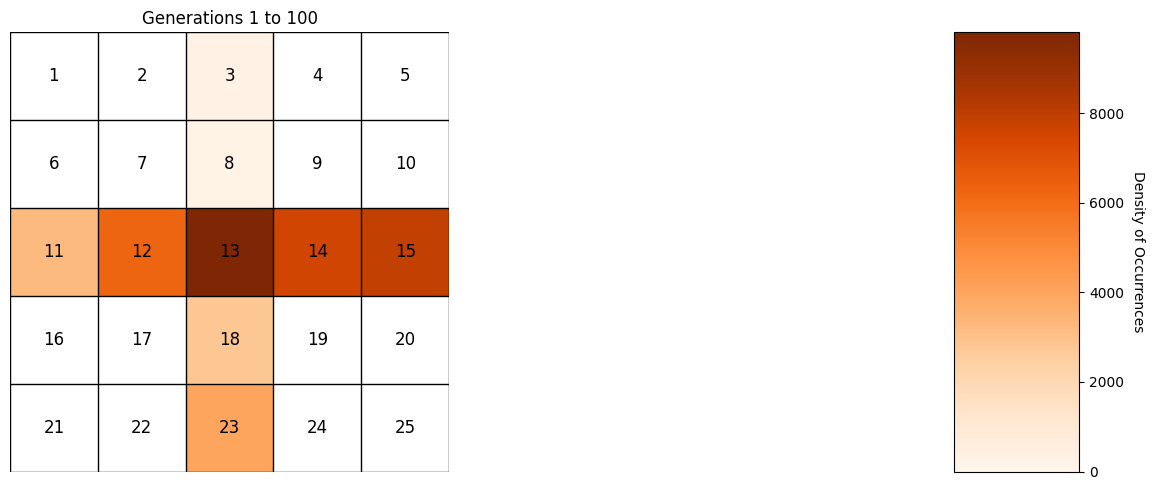

In [145]:
draw_grid_with_density_side_by_side_with_external_colorbar(full, spider_mask, [(1, 100)], mask_ids)